In [71]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from glob import glob
import os

%matplotlib widget

##### Caricamento risultati da array numpy

nets.npy contiene array numpy delle edgelist ad ogni iterazione

In [222]:
beta = 0.2
varc=10.
outputdir = os.path.join(".","outputs","update2",f"beta={beta}_varc={varc}")

# glob trova tutti i path che matchano la sorta di regex dato
# sono tutte le sottocartelle di simulazioni con fissate beta e varc
# a una certa faremo loop su tutte per avere i valori che ci servono
filespaths= glob(outputdir+'/[0-9][0-9]_*')

nets = np.load(filespaths[0]+'/nets.npy')
mus = np.load(filespaths[0]+'/mus.npy')
sigma2s = np.load(filespaths[0]+'/sigma2s.npy')

In [223]:
## Rete iniziale
G0 = nx.from_edgelist(nets[0],create_using=nx.DiGraph)
for i in sorted(G0.nodes):
  (G0.nodes)[i]['mu'] = mus[0][i]
  (G0.nodes)[i]['sigma2']= sigma2s[0][i]

In [224]:
## Rete dopo l'ultima iterazione
G = nx.from_edgelist(nets[-1],create_using=nx.DiGraph)
for i in sorted(G.nodes):
  (G.nodes)[i]['mu'] = mus[-1][i]
  (G.nodes)[i]['sigma2']= sigma2s[-1][i]

### Cose a caso che ho provato a fare

In [225]:
nx.attribute_assortativity_coefficient(G0,'mu'),nx.attribute_assortativity_coefficient(G,'mu')

(-0.0009648194791129386, -0.0009969786927179645)

In [226]:
len(G.nodes()),len(G.edges())

(1000, 1997)

In [ ]:
scc = nx.strongly_connected_components(G)
sorted([len(i) for i in scc],reverse=True)[:5]

[1000]

In [228]:
scc = sorted([(len(i),i) for i in nx.strongly_connected_components(G)],reverse=True)
compmus = []
for component in scc:
  compmu = []
  for node in component[1]:
    compmu.append(G.nodes[node]['mu'])
  compmus.append(np.mean(compmu))
  print(compmus[-1])

0.03802118875194993
1.0379518328191613
0.5582486389745083
1.1946606649285016
-0.5416628167103942
-0.5706269920846344
-0.48960803561559335
-0.5552991831199531
0.1966780318736948
0.7913545219712813
0.8782154479471594
0.8659674277321465
0.8139200760175617
0.0890906201626158
-0.6394764247888013
-1.1005565144181166
0.1588900997998774
0.05228786860362969
-0.48350020179229825
-0.37647780186073926
0.005083421631109889
0.40526292421423527
0.45871887341251133
0.03616208568293151
0.07875676929609939
0.14544777044274412
0.192013023639552
0.42890392075797173
0.12984317312463142
-0.32779895083074784
-0.3108048202439325
0.4174470436610004
0.08679892303628008
0.03637452518928735
-0.03450528818893128
-0.3246363075874272
-0.4511640493936515
-0.37502643401674723
-0.3174616717529074
-0.0720214329654684
-0.5794433393255799
-0.506804221184227
0.3468137169349354
0.41433531920359723
0.09121051744208497
0.25724401768754473
0.3043323070078439
-0.1604548999038231
-0.4651404243827868
0.0793748135095918
0.45106824

In [229]:
np.min(compmus),np.max(compmus)

(np.float64(-1.3956222487677052), np.float64(1.1946606649285016))

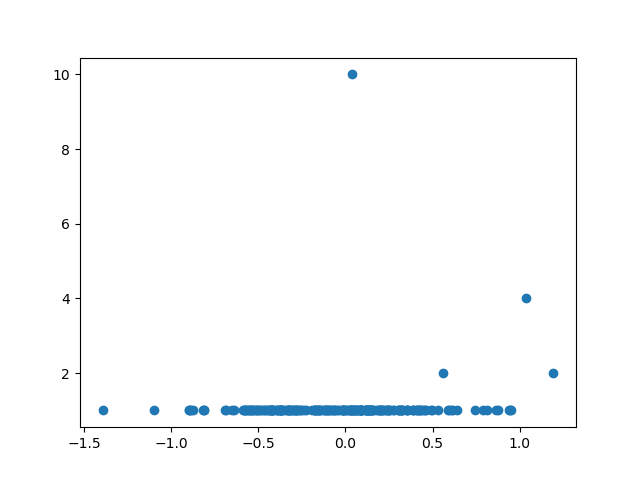

In [230]:
plt.close('all')
num = [i for i,_ in scc]
num[0]=10
plt.plot(compmus,num,'o')

In [177]:
len(compmu)

1

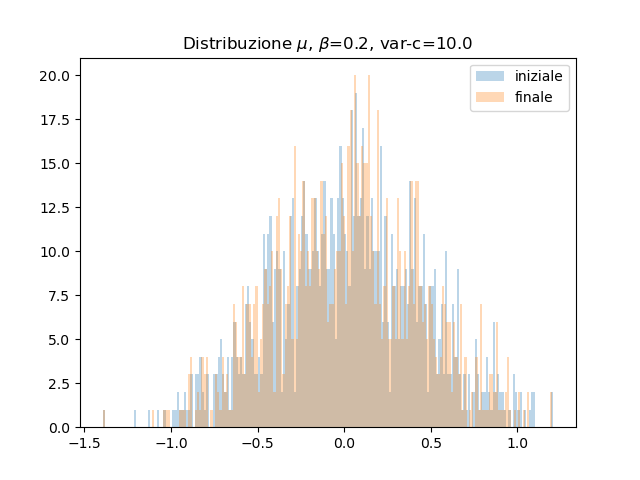

In [231]:
plt.close('all')
plt.title(f'Distribuzione $\\mu$, $\\beta$={beta}, var-c={varc}')
plt.hist(mus[0],bins=200,alpha=0.3,label='iniziale')
plt.hist(mus[-1],bins=200,alpha=0.3,label='finale')
plt.legend()
plt.show()